### Prepare Stage

#### Insights from last doc:
- There are some missing values in the bmi column
- ID and 'ever_married' doesn't seem that valuable for predictive purposes
- Target column 'stroke' is imbalanced and will possibly need to be imputed
- Other cols that needed to be imputed: gender, ever_married, work_type, Residence_type, smoking status
- Make all numeric values-> integer
- Features that need to be created: smoking_status split into 4 columns, residence_type, work_type, male, female

In [62]:
#Imports for this stage:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv('stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#checking for nulls
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#looks like there are 201 nulls 
#replacing any possible whitespace in df with null values 
df.replace(r'^\s*$', np.nan, regex=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#dropping the id col for lack of relevancy
df.drop('id', axis = 1,inplace = True)


In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
#Bmi col has some nans?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df.gender.unique()
#How many instances of this third gender option are evident>?


array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df[df.gender=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
#Bc there is only one instance of this other gender markers, going to drop it
df = df.drop(index = 3116)

In [ ]:
# #converting object type cols into numeric which can be manipulated
# cat_df = df.select_dtypes(include="object").columns
# cat_df   #These are the features we are going to make numeric

In [ ]:
# df = pd.get_dummies(df, drop_first=True)
# df

In [ ]:
df.columns

In [ ]:
#while we are here rename the cols 
# df = df.rename(columns=['gender_Male': 'gender', 'ever_married_Yes': 'ever_married','work_type_Never_worked': 'never_worked',
#                        'work_type_Private': 'private_work', 'work_type_Self-employed': 'self_employed', 'work_type_children': 'career_caregiver',
#                        'Residence_type_Urban': 'residence', ])

<AxesSubplot:>

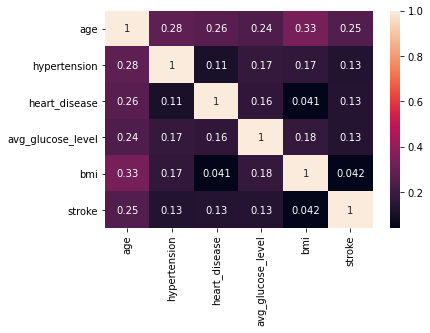

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [15]:
#looking at the target variable
df['stroke'].describe()

count    5109.000000
mean        0.048738
std         0.215340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

In [16]:
print( f"Skewness: {df['stroke'].skew()}")

Skewness: 4.1928068074994735


In [20]:
df['stroke'].iplot(kind='hist')

In [18]:
df.stroke.value_counts(normalize=True)*100
#target variable is imbalanced

0    95.126248
1     4.873752
Name: stroke, dtype: float64

In [19]:
df[numerical].iplot(kind='hist')

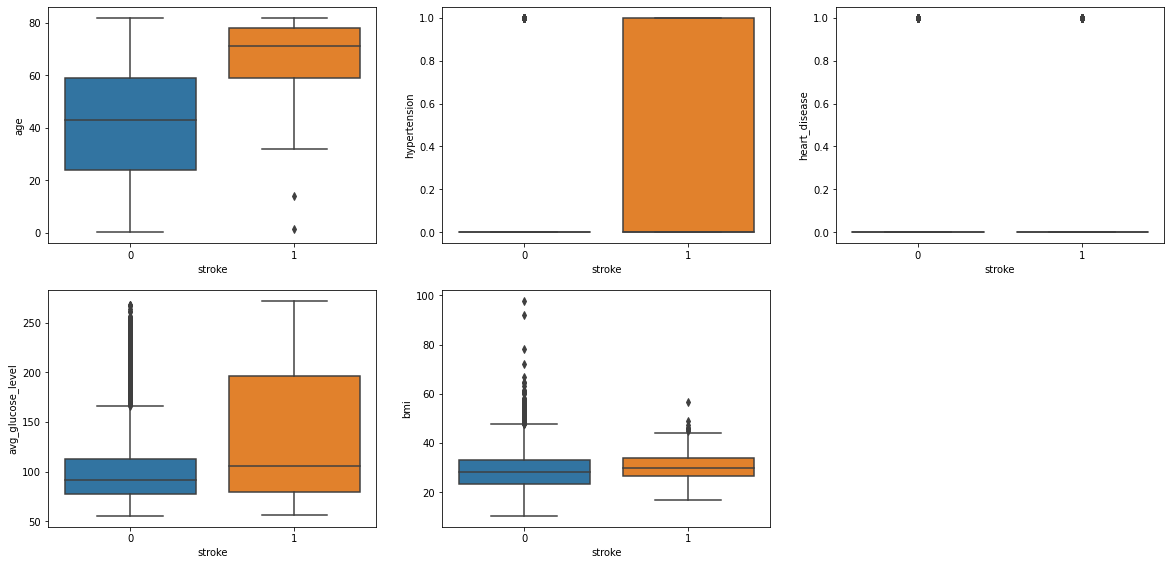

In [21]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke',y=feature,data=df)

<AxesSubplot:>

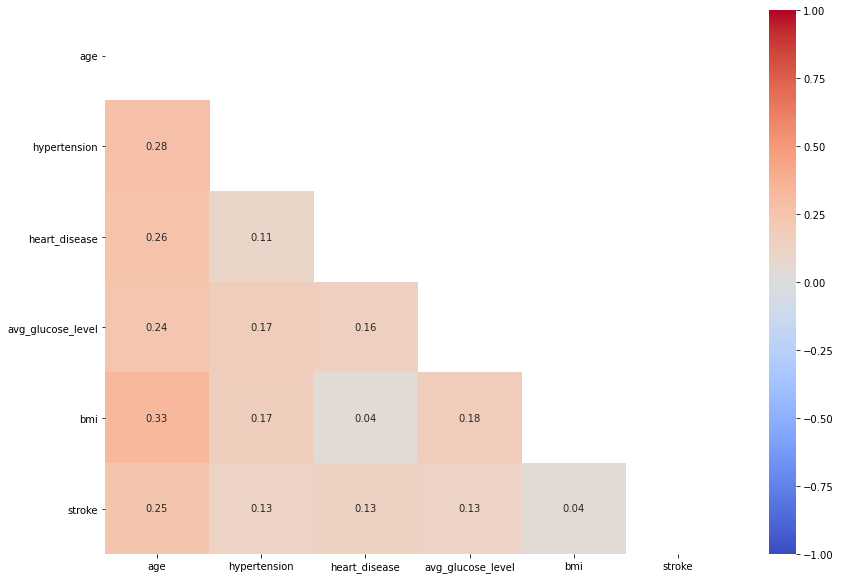

In [22]:
numerical= df.select_dtypes('number').columns

matrix = np.triu(df[numerical].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax)

In [23]:
#looking at the categorical features in the data 
df[categorical].describe().T

,count,unique,top,freq
gender,5109,2,Female,2994
ever_married,5109,2,Yes,3353
work_type,5109,5,Private,2924
Residence_type,5109,2,Urban,2596
smoking_status,5109,4,never smoked,1892


In [24]:
#looking at the average stroke occurrence based off gender
print(df.groupby('gender')['stroke'].mean().sort_values())
print()
df.groupby('gender')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64



In [ ]:
print(df.groupby('work_type')['stroke'].mean().sort_values())
print()
df.groupby('work_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

In [ ]:
print(df.groupby('Residence_type')['stroke'].mean().sort_values())
print()
df.groupby('Residence_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

In [ ]:
print(df.groupby('smoking_status')['stroke'].mean().sort_values())
print()
df.groupby('smoking_status')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

In [ ]:
sns.pairplot(df, hue="stroke")

In [ ]:
df.columns

In [ ]:
df['gender'].value_counts()

### One Hot Encoding for New Features

In [ ]:
gender_df = pd.DataFrame({'gender': ['Male','Female']})
gender_df = pd.get_dummies(df['gender'], drop_first=False)

In [ ]:
gender_df.head()

In [ ]:
#testing the get dummies for all cat columns
test_df = pd.get_dummies(df, drop_first=False)
test_df

In [ ]:
test_df.info()

In [ ]:
#looks good, applying to original df

df = pd.get_dummies(df, drop_first=False)

In [ ]:
#Renaming the cols for readibility
df = df.rename(columns={'gender_Male': 'male', 'gender_Female': 'female', 'ever_married_Yes': 'ever_married',
                        'ever_married_No': 'never_married','work_type_Never_worked': 'never_worked',
                        'work_type_Private': 'private_work', 'work_type_Self-employed': 'self_employed',
                        'work_type_children': 'career_caregiver','work_type_Govt_job': 'govt_work',
                        'Residence_type_Urban': 'residence_Urban', 'Residence_type_Rural': 'residence_rural', 'smoking_status_Unknown':'smoker_unknown', 'smoking_status_formerly smoked': 'past_smoker',
                        'smoking_status_never smoked': 'never_smoked', 'smoking_status_smokes': 'smoker'})
        

In [ ]:
df

### Imputing the Missing Values Found in the BMI col

In [25]:
#imputing the missing values with the mean
df = df.fillna(np.mean(df['bmi']))
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [26]:
#checking on those nulls
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
#beautiful it worked:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.0+ KB


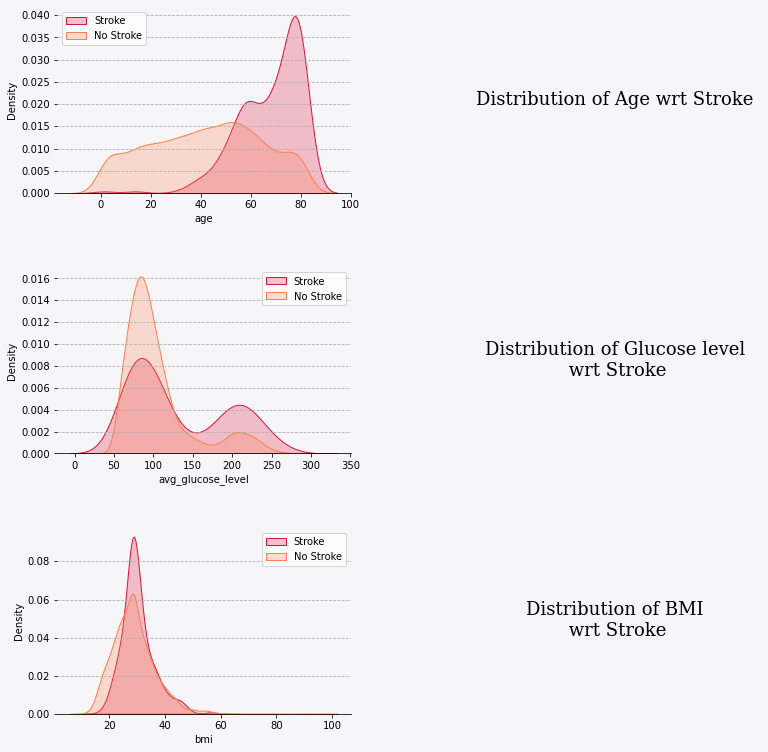

In [28]:
# Analysis with Stroke
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribution of Age wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribution of Glucose level\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Distribution of BMI\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

In [35]:
#setting numeric and categorical variables for further viz/testing
num_df = df[['age','avg_glucose_level','bmi']]
cat_df = df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

<Figure size 2000x1500 with 0 Axes>

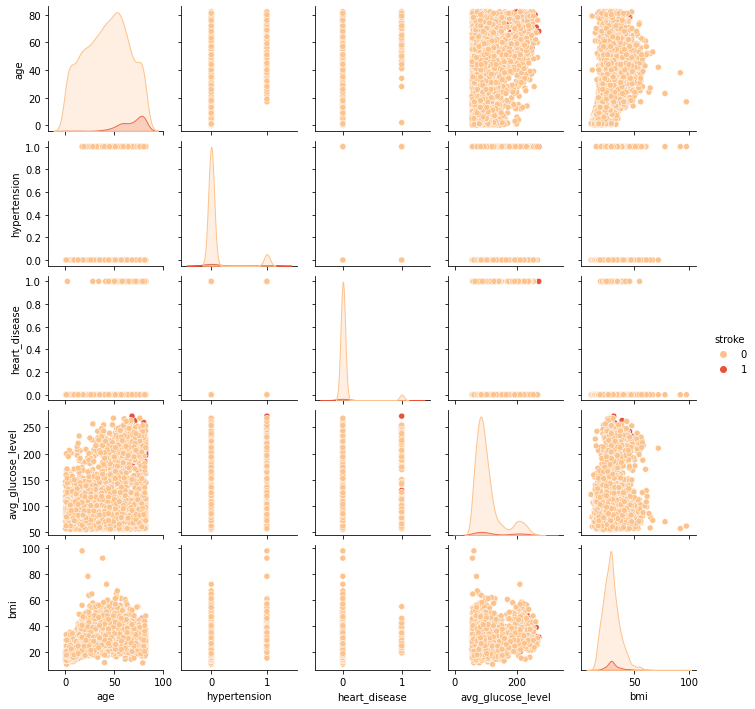

In [30]:
#pairplot of numerical variables
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=df,hue='stroke',height=2,palette='OrRd')
plt.show()

#### Univariate Analysis of Categorical Variables

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: Future

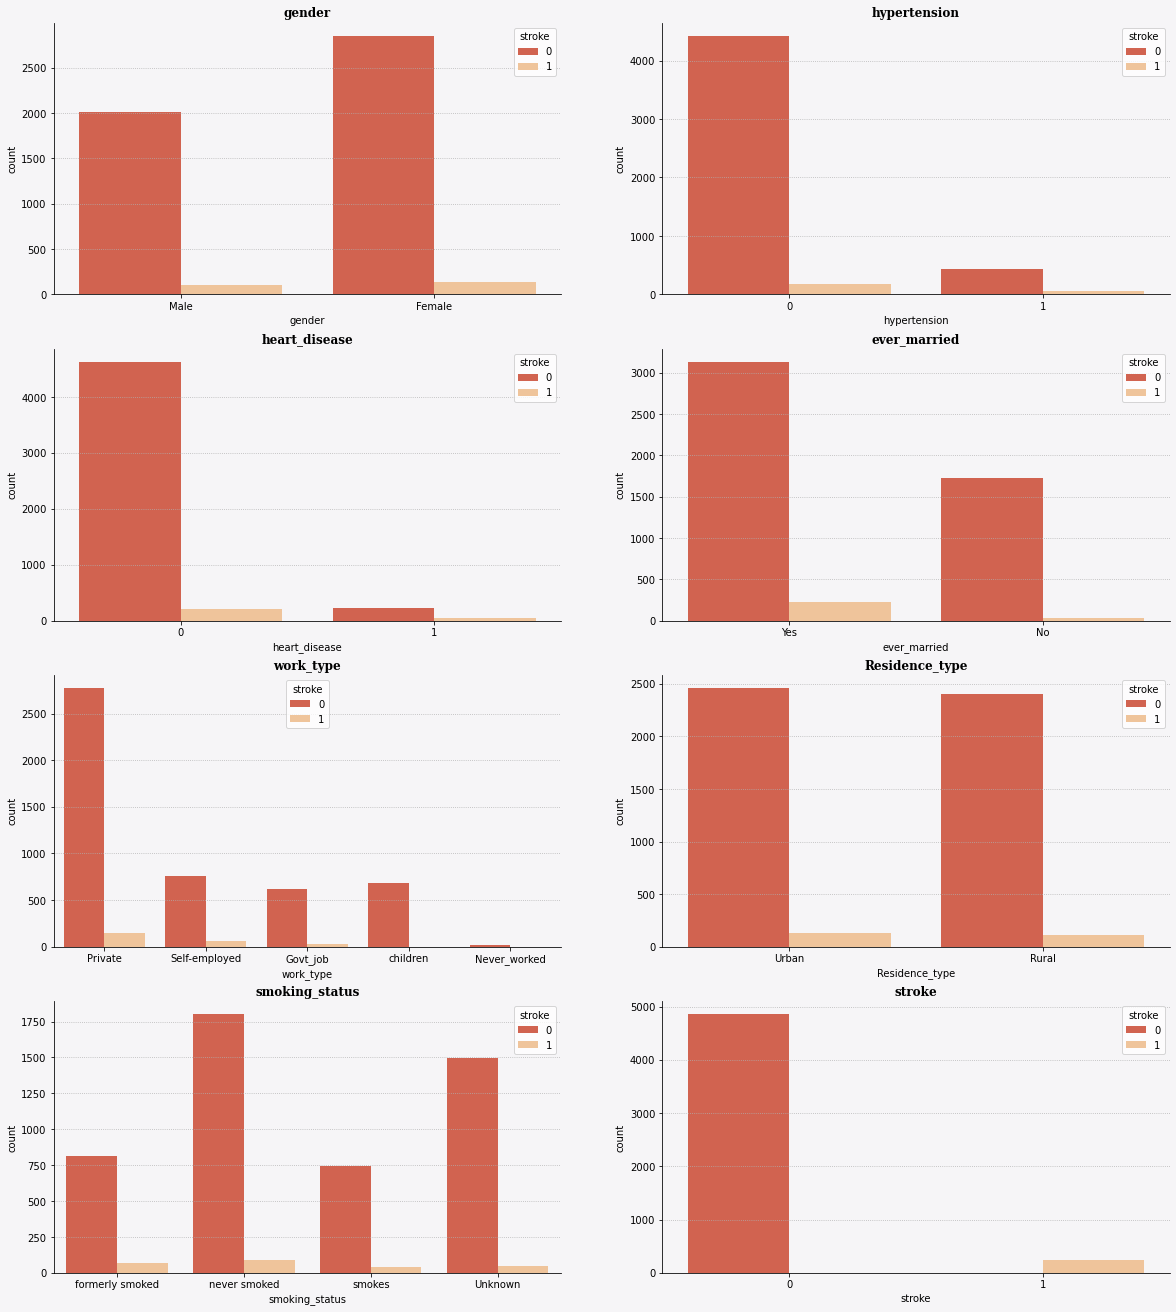

In [32]:
# cat_df =df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
#                        'smoking_status']]

fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(cat_df.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(cat_df[val],palette='OrRd_r',hue=df['stroke'])

Text(-1.7, 1.1, 'Heatmap of Data')

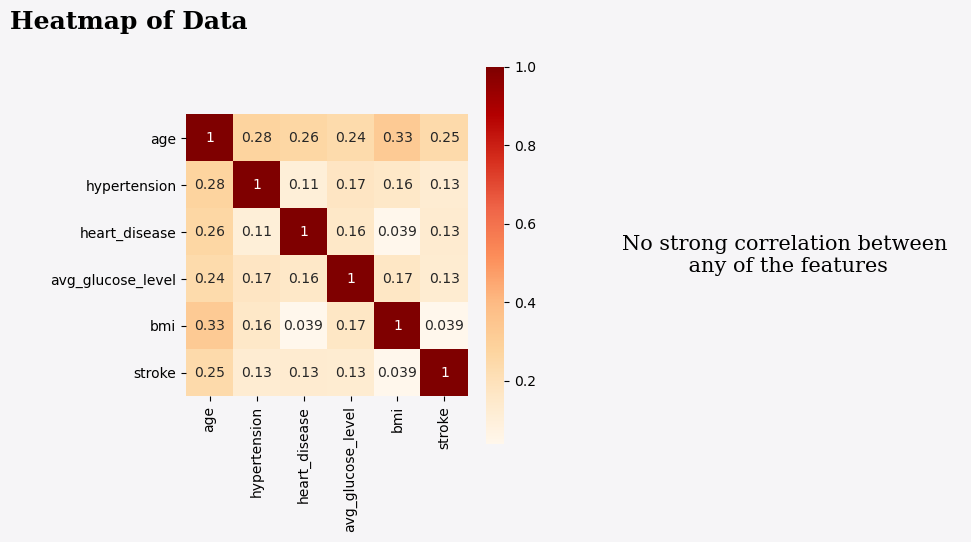

In [33]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)

# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'

# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 

# heatmap of numerical data
corrmat = df.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True, cmap="OrRd",square=True)
ax1.text(0.5,0.5,'No strong correlation between\n any of the features',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Data',fontsize=18,fontweight='bold',fontfamily='serif') 

Takeaways:
- Not a strong correlation between any of the features and the target variable
- Strongest correlation of these w/ target is age
- Strongest correlation for all feats is age and bmi (makes sense


<AxesSubplot:>

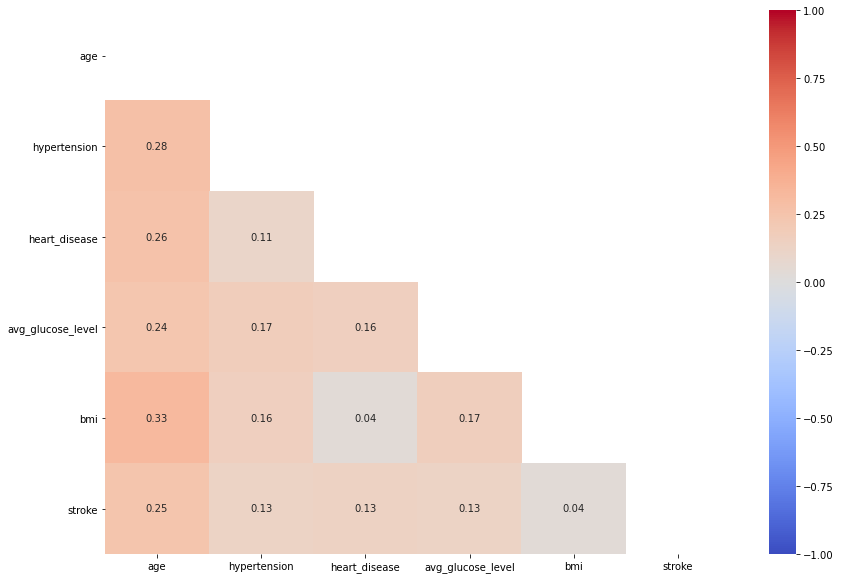

In [34]:
numerical= df.select_dtypes('number').columns

matrix = np.triu(df[numerical].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax)

In [37]:
#looks good, applying to original df

df = pd.get_dummies(df, drop_first=False)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.89456,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.00000,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.60000,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.60000,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [38]:
#Renaming the cols for readibility
df = df.rename(columns={'gender_Male': 'male', 'gender_Female': 'female', 'ever_married_Yes': 'ever_married',
                        'ever_married_No': 'never_married','work_type_Never_worked': 'never_worked',
                        'work_type_Private': 'private_work', 'work_type_Self-employed': 'self_employed',
                        'work_type_children': 'career_caregiver','work_type_Govt_job': 'govt_work',
                        'Residence_type_Urban': 'residence_Urban', 'Residence_type_Rural': 'residence_rural', 'smoking_status_Unknown':'smoker_unknown', 'smoking_status_formerly smoked': 'past_smoker',
                        'smoking_status_never smoked': 'never_smoked', 'smoking_status_smokes': 'smoker'})
        

In [39]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,female,male,never_married,ever_married,...,never_worked,private_work,self_employed,career_caregiver,residence_rural,residence_Urban,smoker_unknown,past_smoker,never_smoked,smoker
0,67.0,0,1,228.69,36.60000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.89456,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.00000,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.60000,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.60000,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


### Train, Test, Split

In [42]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples,
    a test, which is 20% of the entire dataframe,
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe.
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable.
    The function returns train, validate, test sets and also another 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test.
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = (train_test_split(df, test_size=.2, random_state=123))
   
    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target='stroke')
train.shape

(2860, 21)

In [43]:
X_train.shape

(2860, 20)

In [44]:
y_test.head()

1708    0
4768    0
1972    0
981     0
2423    0
Name: stroke, dtype: int64

In [45]:
train.shape

(2860, 21)

In [46]:
validate.shape

(1227, 21)

In [47]:
test.shape

(1022, 21)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

import sklearn.preprocessing
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    #Fit the thing
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    
    #transform the thing
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled


scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)


In [54]:
y_train_df = y_train

In [55]:
train_scaled = pd.concat((X_train_scaled, y_train_df), axis=1)

In [58]:
def target_heat(df, target, method='pearson'):
    '''
    Use seaborn to create heatmap with coeffecient annotations to
    visualize correlation between all variables
    '''

    # define variable for corr matrix
    heat_churn = df.corr()[target][:-1]
    # set figure size
    fig, ax = plt.subplots(figsize=(30, 1))
    # define cmap for chosen color palette
    cmap = sns.diverging_palette(h_neg=220, h_pos=13, sep=25, as_cmap=True)
    # plot matrix turned to DataFrame
    sns.heatmap(heat_churn.to_frame().T, cmap=cmap, center=0,
                annot=True, fmt=".1g", cbar=False, square=True)
    #  improve readability of xticks, remove churn ytick
    plt.xticks(ha='right', va='top', rotation=35, rotation_mode='anchor')
    plt.yticks(ticks=[])
    # set title and print graphic
    plt.title(f'Correlation to {target}\n')
    plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5109 non-null   float64
 1   hypertension       5109 non-null   int64  
 2   heart_disease      5109 non-null   int64  
 3   avg_glucose_level  5109 non-null   float64
 4   bmi                5109 non-null   float64
 5   stroke             5109 non-null   int64  
 6   female             5109 non-null   uint8  
 7   male               5109 non-null   uint8  
 8   never_married      5109 non-null   uint8  
 9   ever_married       5109 non-null   uint8  
 10  govt_work          5109 non-null   uint8  
 11  never_worked       5109 non-null   uint8  
 12  private_work       5109 non-null   uint8  
 13  self_employed      5109 non-null   uint8  
 14  career_caregiver   5109 non-null   uint8  
 15  residence_rural    5109 non-null   uint8  
 16  residence_Urban    5109 

In [57]:
cat_df = df.select_dtypes(include="uint8").columns
cat_df 

Index(['female', 'male', 'never_married', 'ever_married', 'govt_work',
       'never_worked', 'private_work', 'self_employed', 'career_caregiver',
       'residence_rural', 'residence_Urban', 'smoker_unknown', 'past_smoker',
       'never_smoked', 'smoker'],
      dtype='object')

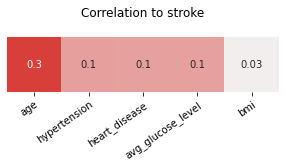

In [59]:
# cat_df =df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
#                        'smoking_status']]
target_heat(train_scaled.drop(
    columns=cat_df), 'stroke')

### Statistical and Hypothetical Testing
#### Plan:
- for categorical to categorical analysis we will use the chi square test
- for numerical to categorical analysis we will use the ANOVA test

### Hypothesis 1:
- There is no relationship between age group and risk of stroke.
- There is a relationship between age group and risk of stroke.


In [63]:
# perform statistical tests on strongest correlations according to heatmap
#age is the strongest correlation
#hy
corr_test(train_scaled, 'age', 'stroke')

   pearson r = 0.26
+--------------------+

        Due to p-value 2.9e-44 being less than our significance level of 0.05, we may reject the null hypothesis 
        that there is not a linear correlation between "age" and "stroke."
        


### Hypothesis 3:
- People that currently smoke do not have a higher risk of stroke than people that don’t currently smoke.
- People that currently smoke have a higher risk of stroke than people that don’t currently smoke.


In [71]:
# cat_df = df[['female', 'male', 'never_married', 'ever_married', 'govt_work',
#        'never_worked', 'private_work', 'self_employed', 'career_caregiver',
#        'residence_rural', 'residence_Urban', 'smoker_unknown', 'past_smoker',
#        'never_smoked', 'smoker']].copy()

In [83]:
#first convert the data into a contingency table
contigency_pct = pd.crosstab(cat_df['stroke'], cat_df['smoker'], normalize='index')
contigency_pct

smoker,0,1
stroke,,
0.0,0.843152,0.156848
1.0,0.840278,0.159722


In [91]:
from sklearn.feature_selection import chi2

res = chi2(df['female', 'male']], df['stroke'])
features = pd.DataFrame({
    'features': df[['female', 'male']],
    'chi2': res[0],
    'p-value': res[1]
})
features.head()

KeyError: ('female', 'male')

<AxesSubplot:xlabel='smoker', ylabel='stroke'>

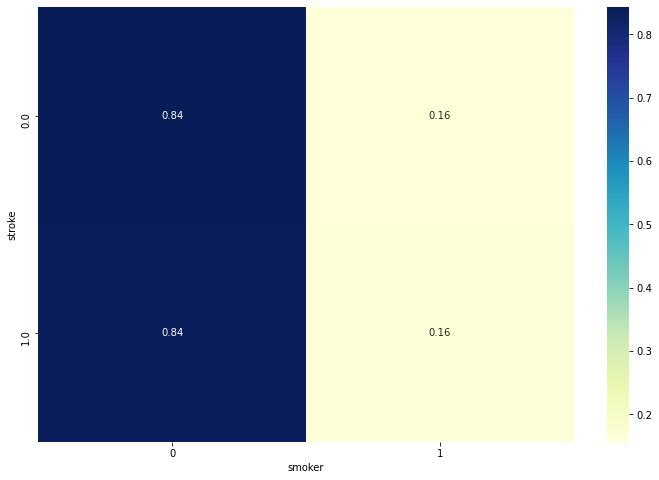

In [84]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [86]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_pct)
p

#We may reject the null hypothesis

0.05340055946788877

In [73]:
cat_df = pd.concat((cat_df, y_train_df), axis=1)
cat_df

,female,male,never_married,ever_married,govt_work,never_worked,private_work,self_employed,career_caregiver,residence_rural,residence_Urban,smoker_unknown,past_smoker,never_smoked,smoker,stroke
0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1.0
1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1.0
2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,NaN
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,NaN
4,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.0
5106,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0.0
5107,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,NaN
5108,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0.0


In [74]:
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
result = pd.DataFrame(data=[(0 for i in range(len(cat_df.columns))) for i in range(len(cat_df.columns))], 
                         columns=list(cat_df.columns))
result.set_index(pd.Index(list(cat_df.columns)), inplace = True)



In [78]:
from sklearn.feature_selection import chi2
# Finding p_value for all columns and putting them in the resultant matrix
for i in list(cat_df.columns):
    for j in list(cat_df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(cat_df[i]).reshape(-1, 1), np.array(cat_df[j]).reshape(-1, 1))
            result.loc[i,j] = p_val
print(result)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
#Is there a correlation between being a past smoker and stroke?
corr_test(train_scaled, 'past_smoker', 'stroke')

   pearson r = 0.059
+--------------------+

        Due to p-value 0.0017 being less than our significance level of 0.05, we may reject the null hypothesis 
        that there is not a linear correlation between "past_smoker" and "stroke."
        


In [67]:
corr_test(train_scaled, 'avg_glucose_level', 'stroke')

   pearson r = 0.13
+--------------------+

        Due to p-value 5.8e-12 being less than our significance level of 0.05, we may reject the null hypothesis 
        that there is not a linear correlation between "avg_glucose_level" and "stroke."
        
